In [10]:
import requests
from bs4 import BeautifulSoup 

In [11]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [12]:
url = "https://themoviedb.org"

In [13]:
outer_link = 'https://www.themoviedb.org'+'/movie'

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36'}

response = requests.get(outer_link,headers = header)

In [14]:
print(response)          ## connection establised

<Response [200]>


In [15]:
content = response.text

In [16]:
content

'<!DOCTYPE html>\n<html lang="en" class="no-js">\n  <head>\n    <title>Popular Movies &#8212; The Movie Database (TMDB)</title>\n    <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n    <meta http-equiv="cleartype" content="on">\n    <meta charset="utf-8">\n    \n    <meta name="keywords" content="Movies, TV Shows, Streaming, Reviews, API, Actors, Actresses, Photos, User Ratings, Synopsis, Trailers, Teasers, Credits, Cast">\n    <meta name="mobile-web-app-capable" content="yes">\n    <meta name="apple-mobile-web-app-capable" content="yes">\n    <meta name="viewport" content="width=device-width,initial-scale=1">\n    \n      <meta name="description" content="The Movie Database (TMDB) is a popular, user editable database for movies and TV shows.">\n    \n    <meta name="msapplication-TileImage" content="/assets/2/v4/icons/mstile-144x144-30e7905a8315a080978ad6aeb71c69222b72c2f75d26dab1224173a96fecc962.png">\n<meta name="msapplication-TileColor" content="#032541">\n<meta name="them

In [17]:
soup = BeautifulSoup(content,'lxml')    ## outerlink text or head page

In [18]:
soup

<!DOCTYPE html>
<html class="no-js" lang="en">
<head>
<title>Popular Movies — The Movie Database (TMDB)</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="on" http-equiv="cleartype"/>
<meta charset="utf-8"/>
<meta content="Movies, TV Shows, Streaming, Reviews, API, Actors, Actresses, Photos, User Ratings, Synopsis, Trailers, Teasers, Credits, Cast" name="keywords"/>
<meta content="yes" name="mobile-web-app-capable"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<meta content="The Movie Database (TMDB) is a popular, user editable database for movies and TV shows." name="description"/>
<meta content="/assets/2/v4/icons/mstile-144x144-30e7905a8315a080978ad6aeb71c69222b72c2f75d26dab1224173a96fecc962.png" name="msapplication-TileImage"/>
<meta content="#032541" name="msapplication-TileColor"/>
<meta content="#032541" name="theme-color"/>
<link href="/assets/2/apple-touch-icon-57ed4b3

In [19]:
class Movie_data:
    def __init__(self):
        self.header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36'}
        self.outer_page_link = 'https://themoviedb.org'
        self.page_link = 'https://themoviedb.org/movie?page='
        
        
        self.movie_name= []
        self.movie_rating = []
        self.movie_release_date = []
        self.movie_genres =[]
        self.movie_director_name = []
        self.movie_runtime = []
        self.movie_url = []
        self.url_data()
        
        
        
        
    def url_data(self):
        for page in range(1,151):
            print("Movie Scrapping :", page)
            outer_link = self.page_link + str(page)
            outer_link_request = requests.get(self.page_link + str(page), headers = self.header)
            soup = BeautifulSoup(outer_link_request.text,'lxml') 
            content = soup.find_all("div",class_ ="card style_1")
            self.name_movie(outer_link)
            
            for inner_link in content:
                inner_link =inner_link.a["href"]
                link = self.outer_page_link + inner_link
                self.movie_url.append(link)
            
                self.release_date(link)
    
    def name_movie(self,link):  #outer_link replace to link
        name = []
        outer_page = requests.get(link,headers =self.header)
        outer_page_html = BeautifulSoup(outer_page.text,'lxml')
        container = outer_page_html.find_all('div',class_ ="card style_1")
        
        for name in container:
            self.movie_name.append(name.find('h2').text)
        self.rating(outer_page_html)
    
    def release_date(self,link):
        page_code = requests.get(link,headers = self.header)
        soup_1 = BeautifulSoup(page_code.text,'lxml')
        #print(soup_1)
        date =soup_1.find("span",class_ ="release")
        date=date.text.strip()
        self.movie_release_date.append(date[0:10])
        #print(self.movie_release_date)
        #print("date ext")
        self.Genres(soup_1)
        
    def Genres(self,soup_1):
        genres_str = ""
        genre= soup_1.find('span',class_='genres')
        genre = genre.text.replace('\n','')
        for i in (genre.split()):
            genres_str+=i
        self.movie_genres.append(genres_str)
        
        self.runtime(soup_1)
    
    def runtime(self,soup_1):
        runtime = soup_1.find("span",class_="runtime")
        try:
            self.movie_runtime.append(runtime.text.replace('\n','').strip())
        except Exception as e:
            self.movie_runtime.append('NAN')
        self.director_name(soup_1)
            
    def director_name(self,soup_1):
        #director_list=[]
        #code=soup_1.find("ol",class_="people no_image")
        #code=code.find_all("p")
        #director_list.append()
        d_name_list=[]
        ol_code=soup_1.find("ol",class_="people no_image")
        ol_code=ol_code.find_all("p")
        
        for i in range (0,len(ol_code)):
            d_lst=ol_code[i].text.split(",")
            for j in d_lst:
                if "Director" == j.strip():
                    d_name_list.append(ol_code[i-1].text)
                    break
        if len(d_name_list)==1:
            self.movie_director_name.append(d_name_list[0])
        else:
            self.movie_director_name.append(",".join(d_name_list))
        
    def rating(self,outer_code):
        rate = outer_code.find_all("div",class_="user_score_chart")
        for score in rate:
            self.movie_rating.append(float(score['data-percent']))
            
        
        
    def movie_data(self):
        print(self.movie_name)
        print(self.movie_rating)
        print(self.movie_release_date)
        print(self.movie_genres) 
        print(self.movie_director_name) 
        print(self.movie_runtime) 
        print(self.movie_url)
        
    def movie_result(self):
        movies = {    "Name" : self.movie_name,
                      "Rating" :self.movie_rating,
                      "Release_date":self.movie_release_date,
                      "Genres": self.movie_genres, 
                      "Director_name" : self.movie_director_name,
                      "Runtime" :self.movie_runtime,
                      "URL" : self.movie_url}
                                              
        return movies
            


In [20]:
scraps=Movie_data()

Movie Scrapping : 1
Movie Scrapping : 2
Movie Scrapping : 3
Movie Scrapping : 4
Movie Scrapping : 5
Movie Scrapping : 6
Movie Scrapping : 7
Movie Scrapping : 8
Movie Scrapping : 9
Movie Scrapping : 10
Movie Scrapping : 11
Movie Scrapping : 12
Movie Scrapping : 13
Movie Scrapping : 14
Movie Scrapping : 15
Movie Scrapping : 16
Movie Scrapping : 17
Movie Scrapping : 18
Movie Scrapping : 19
Movie Scrapping : 20
Movie Scrapping : 21
Movie Scrapping : 22
Movie Scrapping : 23
Movie Scrapping : 24
Movie Scrapping : 25
Movie Scrapping : 26
Movie Scrapping : 27
Movie Scrapping : 28
Movie Scrapping : 29
Movie Scrapping : 30
Movie Scrapping : 31
Movie Scrapping : 32
Movie Scrapping : 33
Movie Scrapping : 34
Movie Scrapping : 35
Movie Scrapping : 36
Movie Scrapping : 37
Movie Scrapping : 38
Movie Scrapping : 39
Movie Scrapping : 40
Movie Scrapping : 41
Movie Scrapping : 42
Movie Scrapping : 43
Movie Scrapping : 44
Movie Scrapping : 45
Movie Scrapping : 46
Movie Scrapping : 47
Movie Scrapping : 48
M

In [227]:
res= scraps.movie_result()

In [228]:
df=pd.DataFrame(res)

In [229]:
df

,Name,Rating,Release_date,Genres,Director_name,Runtime,URL
0,Sonic the Hedgehog 2,77.0,04/08/2022,"Action,ScienceFiction,Comedy,Family,Adventure",Jeff Fowler,2h 2m,https://themoviedb.org/movie/675353
1,Uncharted,72.0,02/18/2022,"Action,Adventure",Ruben Fleischer,1h 56m,https://themoviedb.org/movie/335787
2,The Batman,78.0,03/04/2022,"Crime,Mystery,Thriller",Matt Reeves,2h 56m,https://themoviedb.org/movie/414906
3,Doctor Strange in the Multiverse of Madness,76.0,05/06/2022,"Fantasy,Action,Adventure",Sam Raimi,2h 6m,https://themoviedb.org/movie/453395
4,Spider-Man: No Way Home,81.0,12/17/2021,"Action,Adventure,ScienceFiction",Jon Watts,2h 28m,https://themoviedb.org/movie/634649
...,...,...,...,...,...,...,...
2995,Beautiful Minds,75.0,01/26/2022,"Comedy,Drama","Alexandre Jollien,Bernard Campan",1h 32m,https://themoviedb.org/movie/757999
2996,Musume Bugyo On-na Ro Hisho,0.0,03/24/1995,,Ryôji Shinmura,1h 18m,https://themoviedb.org/movie/729791
2997,The Avengers,44.0,08/14/1998,"Thriller,ScienceFiction",Jeremiah S. Chechik,1h 29m,https://themoviedb.org/movie/9320
2998,Doraemon: Nobita and the Galaxy Super-express,78.0,03/02/1996,"Animation,ScienceFiction,Action",Tsutomu Shibayama,1h 37m,https://themoviedb.org/movie/106164


In [230]:
df.head()

,Name,Rating,Release_date,Genres,Director_name,Runtime,URL
0,Sonic the Hedgehog 2,77.0,04/08/2022,"Action,ScienceFiction,Comedy,Family,Adventure",Jeff Fowler,2h 2m,https://themoviedb.org/movie/675353
1,Uncharted,72.0,02/18/2022,"Action,Adventure",Ruben Fleischer,1h 56m,https://themoviedb.org/movie/335787
2,The Batman,78.0,03/04/2022,"Crime,Mystery,Thriller",Matt Reeves,2h 56m,https://themoviedb.org/movie/414906
3,Doctor Strange in the Multiverse of Madness,76.0,05/06/2022,"Fantasy,Action,Adventure",Sam Raimi,2h 6m,https://themoviedb.org/movie/453395
4,Spider-Man: No Way Home,81.0,12/17/2021,"Action,Adventure,ScienceFiction",Jon Watts,2h 28m,https://themoviedb.org/movie/634649


In [231]:
df.to_csv('Moives_list.csv', index=False, header=True)

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           3000 non-null   object 
 1   Rating         3000 non-null   float64
 2   Release_date   3000 non-null   object 
 3   Genres         3000 non-null   object 
 4   Director_name  3000 non-null   object 
 5   Runtime        3000 non-null   object 
 6   URL            3000 non-null   object 
dtypes: float64(1), object(6)
memory usage: 164.2+ KB


In [233]:
df.describe()

,Rating
count,3000.000000
mean,65.767000
std,11.468793
min,0.000000
25%,61.000000
50%,67.000000
75%,73.000000
max,100.000000


In [234]:
df.isnull()


,Name,Rating,Release_date,Genres,Director_name,Runtime,URL
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False
2996,False,False,False,False,False,False,False
2997,False,False,False,False,False,False,False
2998,False,False,False,False,False,False,False


In [235]:
df_notnull = df.isnull().sum()


In [236]:
df_notnull

Name             0
Rating           0
Release_date     0
Genres           0
Director_name    0
Runtime          0
URL              0
dtype: int64

In [237]:
df.tail

<bound method NDFrame.tail of                                                Name  Rating Release_date  \
0                              Sonic the Hedgehog 2    77.0   04/08/2022   
1                                         Uncharted    72.0   02/18/2022   
2                                        The Batman    78.0   03/04/2022   
3       Doctor Strange in the Multiverse of Madness    76.0   05/06/2022   
4                           Spider-Man: No Way Home    81.0   12/17/2021   
...                                             ...     ...          ...   
2995                                Beautiful Minds    75.0   01/26/2022   
2996                    Musume Bugyo On-na Ro Hisho     0.0   03/24/1995   
2997                                   The Avengers    44.0   08/14/1998   
2998  Doraemon: Nobita and the Galaxy Super-express    78.0   03/02/1996   
2999         UFC 274: Oliveira vs Gaethje - Prelims     0.0   05/07/2022   

                                             Genres  \
0 

In [238]:
Movie_name_null= pd.isnull(df['Name'])

In [239]:
Movie_name_null

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Name: Name, Length: 3000, dtype: bool

In [240]:
Rating_null= pd.isnull(df['Rating'])

In [241]:
Rating_null

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Name: Rating, Length: 3000, dtype: bool

In [242]:
Rel_d_null= pd.isnull(df['Release_date'])

In [243]:
Rel_d_null

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Name: Release_date, Length: 3000, dtype: bool

In [244]:
Genre_null=pd.isnull(df['Genres'])

In [245]:
Genre_null

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Name: Genres, Length: 3000, dtype: bool

In [246]:
Mov_director_null=pd.isnull(df['Director_name'])

In [247]:
Mov_director_null

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Name: Director_name, Length: 3000, dtype: bool

In [248]:
RunT_null=pd.isnull(df['Runtime'])

In [249]:
RunT_null

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Name: Runtime, Length: 3000, dtype: bool

In [250]:
url_null=pd.isnull(df['URL'])

In [251]:
url_null

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Name: URL, Length: 3000, dtype: bool

In [252]:
df.dropna()

,Name,Rating,Release_date,Genres,Director_name,Runtime,URL
0,Sonic the Hedgehog 2,77.0,04/08/2022,"Action,ScienceFiction,Comedy,Family,Adventure",Jeff Fowler,2h 2m,https://themoviedb.org/movie/675353
1,Uncharted,72.0,02/18/2022,"Action,Adventure",Ruben Fleischer,1h 56m,https://themoviedb.org/movie/335787
2,The Batman,78.0,03/04/2022,"Crime,Mystery,Thriller",Matt Reeves,2h 56m,https://themoviedb.org/movie/414906
3,Doctor Strange in the Multiverse of Madness,76.0,05/06/2022,"Fantasy,Action,Adventure",Sam Raimi,2h 6m,https://themoviedb.org/movie/453395
4,Spider-Man: No Way Home,81.0,12/17/2021,"Action,Adventure,ScienceFiction",Jon Watts,2h 28m,https://themoviedb.org/movie/634649
...,...,...,...,...,...,...,...
2995,Beautiful Minds,75.0,01/26/2022,"Comedy,Drama","Alexandre Jollien,Bernard Campan",1h 32m,https://themoviedb.org/movie/757999
2996,Musume Bugyo On-na Ro Hisho,0.0,03/24/1995,,Ryôji Shinmura,1h 18m,https://themoviedb.org/movie/729791
2997,The Avengers,44.0,08/14/1998,"Thriller,ScienceFiction",Jeremiah S. Chechik,1h 29m,https://themoviedb.org/movie/9320
2998,Doraemon: Nobita and the Galaxy Super-express,78.0,03/02/1996,"Animation,ScienceFiction,Action",Tsutomu Shibayama,1h 37m,https://themoviedb.org/movie/106164


In [253]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [254]:
df['Director_name'].value_counts()

                                34
Steven Spielberg                16
Tim Burton                      13
Michael Bay                     12
Ridley Scott                    12
                                ..
Bradley Raymond,Tom Ellery       1
Wendy Morgan                     1
Norton Virgien,Igor Kovalyov     1
Kang Yun-sung                    1
Roberto Mauri                    1
Name: Director_name, Length: 1945, dtype: int64

In [255]:
df['Rating'].value_counts()

67.0    135
70.0    132
69.0    131
66.0    130
68.0    130
       ... 
35.0      1
89.0      1
28.0      1
93.0      1
29.0      1
Name: Rating, Length: 65, dtype: int64

In [256]:
df['Runtime'].value_counts()

1h 30m    104
1h 40m     85
1h 34m     77
1h 37m     73
1h 31m     72
         ... 
3h 40m      1
49m         1
1h 2m       1
27m         1
8m          1
Name: Runtime, Length: 178, dtype: int64

In [257]:
df['Genres'].value_counts()

Comedy                               111
Horror                                99
Drama                                 97
Horror,Thriller                       80
Comedy,Romance                        48
                                    ... 
Adventure,Comedy,Family,Animation      1
Action,Comedy,Thriller,Romance         1
Fantasy,Horror,Comedy                  1
Romance,Horror,Thriller                1
Family,Comedy,Fantasy                  1
Name: Genres, Length: 1060, dtype: int64

In [258]:
df.min()


Name                                          #Alive
Rating                                           0.0
Release_date                              01/01/1981
Genres                                              
Director_name                                       
Runtime                                          10m
URL              https://themoviedb.org/movie/100042
dtype: object

In [259]:
df.max()

Name                                 ¿Y cómo es él?
Rating                                        100.0
Release_date                             12/31/2006
Genres                      Western,Drama,Adventure
Director_name         Éric Toledano,Olivier Nakache
Runtime                                         NAN
URL              https://themoviedb.org/movie/99861
dtype: object

In [260]:
df_Name=df['Name'].value_counts()

In [261]:
df_Name

Cinderella                             3
Halloween                              3
Carrie                                 3
Peter Pan                              2
The Karate Kid                         2
                                      ..
Pixels                                 1
Dragon Ball Z: The Return of Cooler    1
Ender's Game                           1
GoodFellas                             1
Taxi Driver                            1
Name: Name, Length: 2943, dtype: int64

In [284]:
df['Date']= pd.to_datetime(df['Release_date'])

In [285]:
df['Date']

0      2022-04-08
1      2022-02-18
2      2022-03-04
3      2022-05-06
4      2021-12-17
          ...    
2995   2022-01-26
2996   1995-03-24
2997   1998-08-14
2998   1996-03-02
2999   2022-05-07
Name: Date, Length: 3000, dtype: datetime64[ns]

In [ ]:
df['Year']= df['Date'].dt.year

In [286]:
df['Year']

0       2022
1       2022
2       2022
3       2022
4       2021
        ... 
2995    2022
2996    1995
2997    1998
2998    1996
2999    2022
Name: Year, Length: 3000, dtype: int64

In [ ]:
df['Month']= df['Date'].dt.month

In [287]:
df['Month']

0        4
1        2
2        3
3        5
4       12
        ..
2995     1
2996     3
2997     8
2998     3
2999     5
Name: Month, Length: 3000, dtype: int64

In [288]:
df['Day']=df['Date'].dt.day

In [289]:
df['Day']

0        8
1       18
2        4
3        6
4       17
        ..
2995    26
2996    24
2997    14
2998     2
2999     7
Name: Day, Length: 3000, dtype: int64

In [291]:
top_number_movie=5
print("\tmovie name and Release date\n")
for name in df.sort_values(by=["Rating","Release_date"],ascending=False)[0:top_number_movie]["Name"]:
    print(f"""name: {name}\nrelease date : {df[df["Name"]==name]["Release_date"].unique()[0]}\nRating :{df[df["Name"]==name]["Rating"].unique()[0]}""")
    print(f"""Runtime : {df[df["Name"]==name]["Runtime"].unique()[0]}\nGenres :{df[df["Name"]==name]["Genres"].unique()[0]}\n""")

	movie name and Release date

name: Arcadeología
release date : 07/29/2021
Rating :100.0
Runtime : 1h 40m
Genres :Documentary

name: 2000 Mules
release date : 05/02/2022
Rating :100.0
Runtime : NAN
Genres :Documentary,Crime

name: Firestarter
release date : 05/13/2022
Rating :93.0
Runtime : 1h 34m
Genres :Thriller,Fantasy,Horror

name: Everything Everywhere All at Once
release date : 04/08/2022
Rating :89.0
Runtime : 2h 19m
Genres :Action,ScienceFiction,Comedy,Adventure

name: Demon Slayer: Kimetsu no Yaiba Sibling's Bond
release date : 03/29/2019
Rating :88.0
Runtime : 1h 45m
Genres :Action,Animation,Fantasy



In [292]:
for name in df.sort_values(by=["Rating","Release_date"],ascending=False)[0:top_number_movie]["Name"]:
    print(f"""Director Name: {df[df["Name"]==name]["Director_name"].unique()[0]}""")


Director Name: Mario-Paul Martínez
Director Name: Bruce Schooley,Debbie D'Souza,Dinesh D'Souza
Director Name: Keith Thomas
Director Name: Daniel Kwan,Daniel Scheinert
Director Name: Haruo Sotozaki


In [294]:
len(df["Year"].sort_values().unique())

75

In [296]:
df[df["Year"]==1941].sort_values(by=["Rating"],ascending=False).iloc[0][["Name","Rating","Genres","Release_date"]]

Name                       Dumbo
Rating                      70.0
Genres          Animation,Family
Release_date          10/31/1941
Name: 792, dtype: object

In [297]:
print(df[df["Rating"]== df["Rating"].max()]["Name"].unique())

['2000 Mules' 'Arcadeología']


In [298]:
df[df["Rating"]== df["Rating"].max()]["Director_name"]

55      Bruce Schooley,Debbie D'Souza,Dinesh D'Souza
1873                             Mario-Paul Martínez
Name: Director_name, dtype: object

In [333]:
Top10_movie= df.nlargest(n=10,columns=['Rating'])

In [334]:
Top10_movie

,Name,Rating,Release_date,Genres,Director_name,Runtime,URL,Date,Year,Month,Day
55,2000 Mules,100.0,05/02/2022,"Documentary,Crime","Bruce Schooley,Debbie D'Souza,Dinesh D'Souza",NAN,https://themoviedb.org/movie/933554,2022-05-02,2022,5,2
1873,Arcadeología,100.0,07/29/2021,Documentary,Mario-Paul Martínez,1h 40m,https://themoviedb.org/movie/853424,2021-07-29,2021,7,29
1219,Firestarter,93.0,05/13/2022,"Thriller,Fantasy,Horror",Keith Thomas,1h 34m,https://themoviedb.org/movie/532710,2022-05-13,2022,5,13
809,Everything Everywhere All at Once,89.0,04/08/2022,"Action,ScienceFiction,Comedy,Adventure","Daniel Kwan,Daniel Scheinert",2h 19m,https://themoviedb.org/movie/545611,2022-04-08,2022,4,8
693,Demon Slayer: Kimetsu no Yaiba Sibling's Bond,88.0,03/29/2019,"Action,Animation,Fantasy",Haruo Sotozaki,1h 45m,https://themoviedb.org/movie/820232,2019-03-29,2019,3,29
570,Burn the Stage: The Movie,87.0,11/15/2018,"Documentary,Music",Park Jun-soo,1h 25m,https://themoviedb.org/movie/553512,2018-11-15,2018,11,15
845,The Godfather,87.0,03/14/1972,"Drama,Crime",Francis Ford Coppola,2h 55m,https://themoviedb.org/movie/238,1972-03-14,1972,3,14
1069,The Shawshank Redemption,87.0,10/14/1994,"Drama,Crime",Frank Darabont,2h 22m,https://themoviedb.org/movie/278,1994-10-14,1994,10,14
2023,Impossible Things,87.0,06/17/2021,"Family,Drama",Ernesto Contreras,1h 29m,https://themoviedb.org/movie/667257,2021-06-17,2021,6,17
1043,Your Eyes Tell,86.0,10/23/2020,"Romance,Drama",Takahiro Miki,2h 3m,https://themoviedb.org/movie/730154,2020-10-23,2020,10,23


In [303]:
least10_movie= df.nsmallest(n=10,columns='Rating')

In [304]:
least10_movie

,Name,Rating,Release_date,Genres,Director_name,Runtime,URL,Date,Year,Month,Day
132,Dragon Ball Super: Super Hero,0.0,06/11/2022,"Animation,ScienceFiction,Action",Tetsuro Kodama,NAN,https://themoviedb.org/movie/610150,2022-06-11,2022,6,11
161,Jurassic World Dominion,0.0,06/10/2022,"Adventure,Action,ScienceFiction,Thriller",Colin Trevorrow,2h 26m,https://themoviedb.org/movie/507086,2022-06-10,2022,6,10
193,After Ever Happy,0.0,08/25/2022,Romance,Castille Landon,1h 59m,https://themoviedb.org/movie/744276,2022-08-25,2022,8,25
224,Top Gun: Maverick,0.0,05/27/2022,"Action,Drama",Joseph Kosinski,2h 11m,https://themoviedb.org/movie/361743,2022-05-27,2022,5,27
301,Thor: Love and Thunder,0.0,07/08/2022,"Action,Adventure,Fantasy",Taika Waititi,NAN,https://themoviedb.org/movie/616037,2022-07-08,2022,7,8
697,Minions: The Rise of Gru,0.0,07/01/2022,"Family,Animation,Action,Adventure,Comedy",Kyle Balda,1h 27m,https://themoviedb.org/movie/438148,2022-07-01,2022,7,1
903,Miraculous,0.0,08/03/2022,"Action,Animation,Adventure,Fantasy,Music",Jeremy Zag,NAN,https://themoviedb.org/movie/496450,2022-08-03,2022,8,3
1191,BTS World Tour 'Love Yourself: Speak Yourself'...,0.0,09/24/2019,"Documentary,Music",,2h 48m,https://themoviedb.org/movie/820596,2019-09-24,2019,9,24
1282,The Black Phone,0.0,06/24/2022,"Horror,Thriller",Scott Derrickson,1h 42m,https://themoviedb.org/movie/756999,2022-06-24,2022,6,24
1294,One Piece Film: Red,0.0,08/06/2022,"Animation,Adventure,Action,Fantasy",Goro Taniguchi,NAN,https://themoviedb.org/movie/900667,2022-08-06,2022,8,6


In [337]:
Rating100=df[df['Rating']==100]

In [338]:
Rating100

,Name,Rating,Release_date,Genres,Director_name,Runtime,URL,Date,Year,Month,Day
55,2000 Mules,100.0,05/02/2022,"Documentary,Crime","Bruce Schooley,Debbie D'Souza,Dinesh D'Souza",NAN,https://themoviedb.org/movie/933554,2022-05-02,2022,5,2
1873,Arcadeología,100.0,07/29/2021,Documentary,Mario-Paul Martínez,1h 40m,https://themoviedb.org/movie/853424,2021-07-29,2021,7,29


In [341]:
Rating75=df[df['Rating']>=75]

In [342]:
Rating75

,Name,Rating,Release_date,Genres,Director_name,Runtime,URL,Date,Year,Month,Day
0,Sonic the Hedgehog 2,77.0,04/08/2022,"Action,ScienceFiction,Comedy,Family,Adventure",Jeff Fowler,2h 2m,https://themoviedb.org/movie/675353,2022-04-08,2022,4,8
2,The Batman,78.0,03/04/2022,"Crime,Mystery,Thriller",Matt Reeves,2h 56m,https://themoviedb.org/movie/414906,2022-03-04,2022,3,4
3,Doctor Strange in the Multiverse of Madness,76.0,05/06/2022,"Fantasy,Action,Adventure",Sam Raimi,2h 6m,https://themoviedb.org/movie/453395,2022-05-06,2022,5,6
4,Spider-Man: No Way Home,81.0,12/17/2021,"Action,Adventure,ScienceFiction",Jon Watts,2h 28m,https://themoviedb.org/movie/634649,2021-12-17,2021,12,17
7,The Bad Guys,78.0,04/22/2022,"Animation,Comedy,Action,Family,Crime",Pierre Perifel,1h 40m,https://themoviedb.org/movie/629542,2022-04-22,2022,4,22
...,...,...,...,...,...,...,...,...,...,...,...
2964,Evangelion: 2.0 You Can (Not) Advance,79.0,06/26/2009,"Animation,ScienceFiction,Action,Drama",Hideaki Anno,1h 52m,https://themoviedb.org/movie/22843,2009-06-26,2009,6,26
2976,Hey Arnold! The Jungle Movie,77.0,08/13/2018,"Family,Comedy,Animation,Adventure",Raymie Muzquiz,1h 21m,https://themoviedb.org/movie/439058,2018-08-13,2018,8,13
2994,One Flew Over the Cuckoo's Nest,84.0,11/18/1975,Drama,Miloš Forman,2h 13m,https://themoviedb.org/movie/510,1975-11-18,1975,11,18
2995,Beautiful Minds,75.0,01/26/2022,"Comedy,Drama","Alexandre Jollien,Bernard Campan",1h 32m,https://themoviedb.org/movie/757999,2022-01-26,2022,1,26


In [305]:
temp=[]
for index_no in range(0,len(df["Genres"])):
    str1=df["Genres"].loc[index_no]
    for i in str1.split(","):
        if i not in temp:
            temp.append(i)
            print(index_no)


0
0
0
0
0
2
2
2
3
6
8
8
9
28
44
52
55
57
95
794


In [306]:
print(temp)

['Action', 'ScienceFiction', 'Comedy', 'Family', 'Adventure', 'Crime', 'Mystery', 'Thriller', 'Fantasy', 'Animation', 'Romance', 'Drama', 'Horror', 'Music', 'War', 'Western', 'Documentary', 'TVMovie', 'History', '']


In [343]:
Action = df[df["Genres"]=="Action"]

In [346]:
Action

,Name,Rating,Release_date,Genres,Director_name,Runtime,URL,Date,Year,Month,Day
15,Yaksha: Ruthless Operations,62.0,04/08/2022,Action,Na Hyun,2h 5m,https://themoviedb.org/movie/606402,2022-04-08,2022,4,8
105,One Shot,68.0,01/21/2022,Action,James Nunn,1h 37m,https://themoviedb.org/movie/811592,2022-01-21,2022,1,21
226,Crazy Fist,70.0,05/06/2021,Action,Qing Guo,1h 37m,https://themoviedb.org/movie/859041,2021-05-06,2021,5,6
271,Moon Knight,60.0,01/17/2019,Action,Caden Butera,17m,https://themoviedb.org/movie/580096,2019-01-17,2019,1,17
355,Redemption Day,62.0,01/08/2021,Action,Hicham Hajji,1h 40m,https://themoviedb.org/movie/767304,2021-01-08,2021,1,8
376,Sweet Girl,68.0,08/18/2021,Action,Brian Andrew Mendoza,1h 50m,https://themoviedb.org/movie/619297,2021-08-18,2021,8,18
456,Ninja Assassin,65.0,09/29/2009,Action,James McTeigue,1h 39m,https://themoviedb.org/movie/22832,2009-09-29,2009,9,29
477,Never Back Down: Revolt,66.0,11/16/2021,Action,Kellie Madison,1h 29m,https://themoviedb.org/movie/763025,2021-11-16,2021,11,16
503,American Badger,59.0,06/15/2021,Action,Kirk Caouette,1h 28m,https://themoviedb.org/movie/768449,2021-06-15,2021,6,15
507,The Protégé,66.0,08/20/2021,Action,Martin Campbell,1h 49m,https://themoviedb.org/movie/645788,2021-08-20,2021,8,20


In [347]:

Western= df[df["Genres"]=="Western"]

In [348]:
Western

,Name,Rating,Release_date,Genres,Director_name,Runtime,URL,Date,Year,Month,Day
325,The Harder They Fall,67.0,10/22/2021,Western,Jeymes Samuel,2h 19m,https://themoviedb.org/movie/618162,2021-10-22,2021,10,22
2349,"The Good, the Bad and the Ugly",85.0,04/15/1969,Western,Sergio Leone,2h 41m,https://themoviedb.org/movie/429,1969-04-15,1969,4,15


In [350]:
Drama = df[df["Genres"]=="Drama"]

In [351]:
Drama

,Name,Rating,Release_date,Genres,Director_name,Runtime,URL,Date,Year,Month,Day
116,Dancing on Glass,58.0,04/08/2022,Drama,Jota Linares,2h 17m,https://themoviedb.org/movie/800407,2022-04-08,2022,4,8
129,The Help,82.0,11/25/2011,Drama,Tate Taylor,2h 26m,https://themoviedb.org/movie/50014,2011-11-25,2011,11,25
222,Ava,60.0,06/21/2017,Drama,Léa Mysius,1h 46m,https://themoviedb.org/movie/453354,2017-06-21,2017,6,21
318,The Fallout,74.0,01/17/2022,Drama,Megan Park,1h 36m,https://themoviedb.org/movie/795514,2022-01-17,2022,1,17
432,Creed II,70.0,11/21/2018,Drama,Steven Caple Jr.,2h 10m,https://themoviedb.org/movie/480530,2018-11-21,2018,11,21
...,...,...,...,...,...,...,...,...,...,...,...
2902,Drive My Car,75.0,08/20/2021,Drama,Ryusuke Hamaguchi,2h 59m,https://themoviedb.org/movie/758866,2021-08-20,2021,8,20
2907,The Beguiled,59.0,06/23/2017,Drama,Sofia Coppola,1h 33m,https://themoviedb.org/movie/399019,2017-06-23,2017,6,23
2915,Melissa P.,44.0,11/18/2005,Drama,Luca Guadagnino,1h 40m,https://themoviedb.org/movie/13461,2005-11-18,2005,11,18
2922,Happening,69.0,11/24/2021,Drama,Audrey Diwan,1h 40m,https://themoviedb.org/movie/793998,2021-11-24,2021,11,24


In [307]:
df.head()

,Name,Rating,Release_date,Genres,Director_name,Runtime,URL,Date,Year,Month,Day
0,Sonic the Hedgehog 2,77.0,04/08/2022,"Action,ScienceFiction,Comedy,Family,Adventure",Jeff Fowler,2h 2m,https://themoviedb.org/movie/675353,2022-04-08,2022,4,8
1,Uncharted,72.0,02/18/2022,"Action,Adventure",Ruben Fleischer,1h 56m,https://themoviedb.org/movie/335787,2022-02-18,2022,2,18
2,The Batman,78.0,03/04/2022,"Crime,Mystery,Thriller",Matt Reeves,2h 56m,https://themoviedb.org/movie/414906,2022-03-04,2022,3,4
3,Doctor Strange in the Multiverse of Madness,76.0,05/06/2022,"Fantasy,Action,Adventure",Sam Raimi,2h 6m,https://themoviedb.org/movie/453395,2022-05-06,2022,5,6
4,Spider-Man: No Way Home,81.0,12/17/2021,"Action,Adventure,ScienceFiction",Jon Watts,2h 28m,https://themoviedb.org/movie/634649,2021-12-17,2021,12,17


In [308]:
df["Genres"].loc[10]

'Action,Adventure,Fantasy,ScienceFiction'

In [309]:
df["Runtime"].loc[10].split(" ")

['1h', '55m']

In [310]:
df.loc[350]

Name                                      Polar Bear
Rating                                          83.0
Release_date                              04/22/2022
Genres                                   Documentary
Director_name        Alastair Fothergill,Jeff Wilson
Runtime                                       1h 24m
URL              https://themoviedb.org/movie/927070
Date                             2022-04-22 00:00:00
Year                                            2022
Month                                              4
Day                                               22
Name: 350, dtype: object

In [311]:
df

,Name,Rating,Release_date,Genres,Director_name,Runtime,URL,Date,Year,Month,Day
0,Sonic the Hedgehog 2,77.0,04/08/2022,"Action,ScienceFiction,Comedy,Family,Adventure",Jeff Fowler,2h 2m,https://themoviedb.org/movie/675353,2022-04-08,2022,4,8
1,Uncharted,72.0,02/18/2022,"Action,Adventure",Ruben Fleischer,1h 56m,https://themoviedb.org/movie/335787,2022-02-18,2022,2,18
2,The Batman,78.0,03/04/2022,"Crime,Mystery,Thriller",Matt Reeves,2h 56m,https://themoviedb.org/movie/414906,2022-03-04,2022,3,4
3,Doctor Strange in the Multiverse of Madness,76.0,05/06/2022,"Fantasy,Action,Adventure",Sam Raimi,2h 6m,https://themoviedb.org/movie/453395,2022-05-06,2022,5,6
4,Spider-Man: No Way Home,81.0,12/17/2021,"Action,Adventure,ScienceFiction",Jon Watts,2h 28m,https://themoviedb.org/movie/634649,2021-12-17,2021,12,17
...,...,...,...,...,...,...,...,...,...,...,...
2995,Beautiful Minds,75.0,01/26/2022,"Comedy,Drama","Alexandre Jollien,Bernard Campan",1h 32m,https://themoviedb.org/movie/757999,2022-01-26,2022,1,26
2996,Musume Bugyo On-na Ro Hisho,0.0,03/24/1995,,Ryôji Shinmura,1h 18m,https://themoviedb.org/movie/729791,1995-03-24,1995,3,24
2997,The Avengers,44.0,08/14/1998,"Thriller,ScienceFiction",Jeremiah S. Chechik,1h 29m,https://themoviedb.org/movie/9320,1998-08-14,1998,8,14
2998,Doraemon: Nobita and the Galaxy Super-express,78.0,03/02/1996,"Animation,ScienceFiction,Action",Tsutomu Shibayama,1h 37m,https://themoviedb.org/movie/106164,1996-03-02,1996,3,2


In [312]:
df.describe()


,Rating,Year,Month,Day
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,65.767000,2011.672667,6.728333,15.647000
std,11.468793,11.314129,3.379498,8.645113
min,0.000000,1939.000000,1.000000,1.000000
25%,61.000000,2008.000000,4.000000,8.000000
50%,67.000000,2015.000000,7.000000,16.000000
75%,73.000000,2020.000000,10.000000,23.000000
max,100.000000,2022.000000,12.000000,31.000000


In [313]:
y=df['Year']

x=df['Rating']

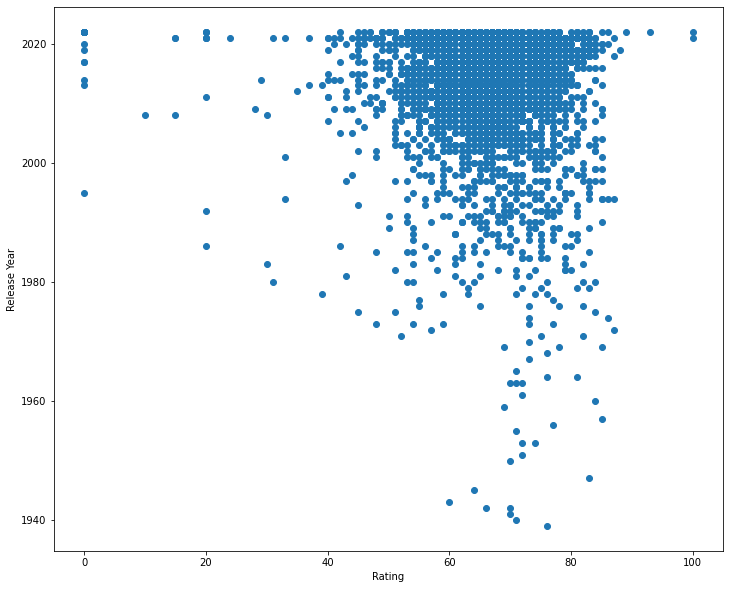

In [314]:
fig=plt.figure(figsize=(12,10))
plt.scatter(x,y)
plt.xlabel('Rating')
plt.ylabel('Release Year')
plt.show()

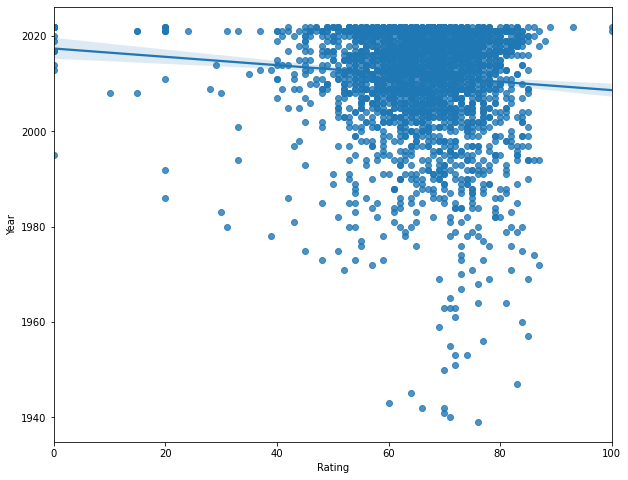

In [315]:
fig=plt.figure(figsize=(10,8))
sns.regplot(x='Rating',y='Year',data=df)
plt.show()

In [316]:
df

,Name,Rating,Release_date,Genres,Director_name,Runtime,URL,Date,Year,Month,Day
0,Sonic the Hedgehog 2,77.0,04/08/2022,"Action,ScienceFiction,Comedy,Family,Adventure",Jeff Fowler,2h 2m,https://themoviedb.org/movie/675353,2022-04-08,2022,4,8
1,Uncharted,72.0,02/18/2022,"Action,Adventure",Ruben Fleischer,1h 56m,https://themoviedb.org/movie/335787,2022-02-18,2022,2,18
2,The Batman,78.0,03/04/2022,"Crime,Mystery,Thriller",Matt Reeves,2h 56m,https://themoviedb.org/movie/414906,2022-03-04,2022,3,4
3,Doctor Strange in the Multiverse of Madness,76.0,05/06/2022,"Fantasy,Action,Adventure",Sam Raimi,2h 6m,https://themoviedb.org/movie/453395,2022-05-06,2022,5,6
4,Spider-Man: No Way Home,81.0,12/17/2021,"Action,Adventure,ScienceFiction",Jon Watts,2h 28m,https://themoviedb.org/movie/634649,2021-12-17,2021,12,17
...,...,...,...,...,...,...,...,...,...,...,...
2995,Beautiful Minds,75.0,01/26/2022,"Comedy,Drama","Alexandre Jollien,Bernard Campan",1h 32m,https://themoviedb.org/movie/757999,2022-01-26,2022,1,26
2996,Musume Bugyo On-na Ro Hisho,0.0,03/24/1995,,Ryôji Shinmura,1h 18m,https://themoviedb.org/movie/729791,1995-03-24,1995,3,24
2997,The Avengers,44.0,08/14/1998,"Thriller,ScienceFiction",Jeremiah S. Chechik,1h 29m,https://themoviedb.org/movie/9320,1998-08-14,1998,8,14
2998,Doraemon: Nobita and the Galaxy Super-express,78.0,03/02/1996,"Animation,ScienceFiction,Action",Tsutomu Shibayama,1h 37m,https://themoviedb.org/movie/106164,1996-03-02,1996,3,2


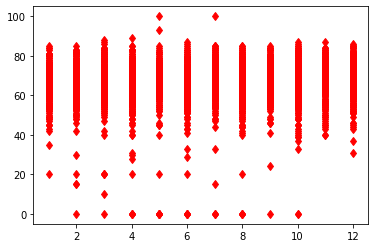

In [321]:
plt.plot(df['Month'],df['Rating'],'rd')